In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe

In [2]:
	
import mediapipe
import cv2
#https://www.pexels.com/photo/portrait-photo-of-woman-in-white-crew-neck-shirt-8090149/
img = cv2.imread("Img/girl.jpg")
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection( min_detection_confidence = 0.6)

results = face_detector.process(img)

if results.detections:
    for face in results.detections:
        confidence = face.score
        bounding_box = face.location_data.relative_bounding_box
         
        x = int(bounding_box.xmin * img.shape[1])
        w = int(bounding_box.width * img.shape[1])
        y = int(bounding_box.ymin * img.shape[0])
        h = int(bounding_box.height * img.shape[0])
         
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), thickness = 2)

landmarks = face.location_data.relative_keypoints
 
right_eye = (int(landmarks[0].x * img.shape[1]), int(landmarks[0].y * img.shape[0]))
left_eye = (int(landmarks[1].x * img.shape[1]), int(landmarks[1].y * img.shape[0]))
nose = (int(landmarks[2].x * img.shape[1]), int(landmarks[2].y * img.shape[0]))
mouth = (int(landmarks[3].x * img.shape[1]), int(landmarks[3].y * img.shape[0]))
right_ear = (int(landmarks[4].x * img.shape[1]), int(landmarks[4].y * img.shape[0]))
left_ear = (int(landmarks[5].x * img.shape[1]), int(landmarks[5].y * img.shape[0]))
 
cv2.circle(img, right_eye, 15, (0, 0, 255), -1)
cv2.circle(img, left_eye, 15, (0, 0, 255), -1)
cv2.circle(img, nose, 15, (0, 0, 255), -1)
cv2.circle(img, mouth, 15, (0, 0, 255), -1)
cv2.circle(img, right_ear, 15, (0, 0, 255), -1)
cv2.circle(img, left_ear, 15, (0, 0, 255), -1)

cv2.imshow("Original",img)
cv2.waitKey()
#press any key to close the windows
cv2.destroyAllWindows()


In [5]:
path = r"Img/test.jpg"
img_base = cv2.imread(path)
img = img_base.copy()

In [ ]:
mediapipe.

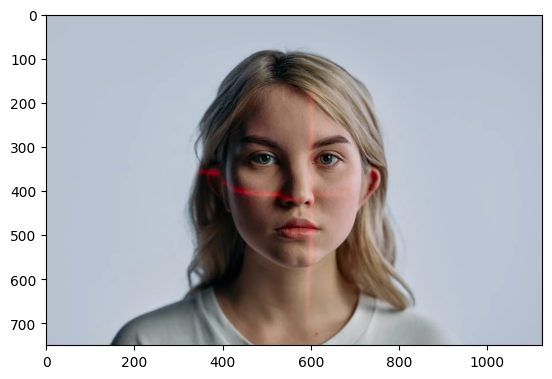

In [6]:
plt.imshow(img[:, :, ::-1])

# Facial landmarks

In [21]:
faceModule = mediapipe.solutions.face_mesh

In [22]:
face_mesh = faceModule.FaceMesh(static_image_mode=True)
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
landmarks = results.multi_face_landmarks[0]

In [24]:
facial_areas = {
    'Contours': faceModule.FACEMESH_CONTOURS
    , 'Lips': faceModule.FACEMESH_LIPS
    , 'Face_oval': faceModule.FACEMESH_FACE_OVAL
    , 'Left_eye': faceModule.FACEMESH_LEFT_EYE
    , 'Left_eye_brow': faceModule.FACEMESH_LEFT_EYEBROW
    , 'Right_eye': faceModule.FACEMESH_RIGHT_EYE
    , 'Right_eye_brow': faceModule.FACEMESH_RIGHT_EYEBROW
    , 'Tesselation': faceModule.FACEMESH_TESSELATION
}

In [25]:
def plot_landmark(img_base, facial_area_name, facial_area_obj):
    
    print(facial_area_name, ":")
    
    img = img_base.copy()
    
    for source_idx, target_idx in facial_area_obj:
        source = landmarks.landmark[source_idx]
        target = landmarks.landmark[target_idx]

        relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
        relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))

        cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
    
    fig = plt.figure(figsize = (15, 15))
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])
    plt.show()

Tesselation :


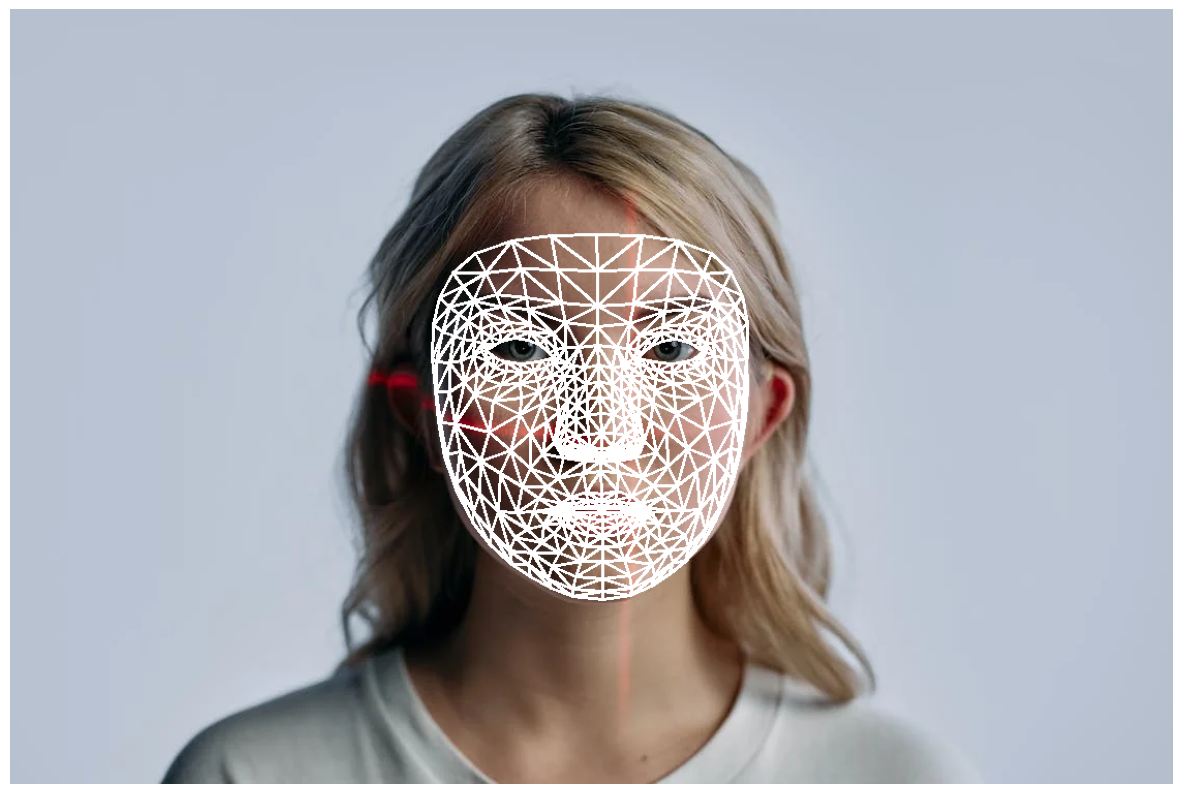

In [26]:
facial_area_obj = faceModule.FACEMESH_TESSELATION
plot_landmark(img_base, 'Tesselation', facial_area_obj)

Contours :


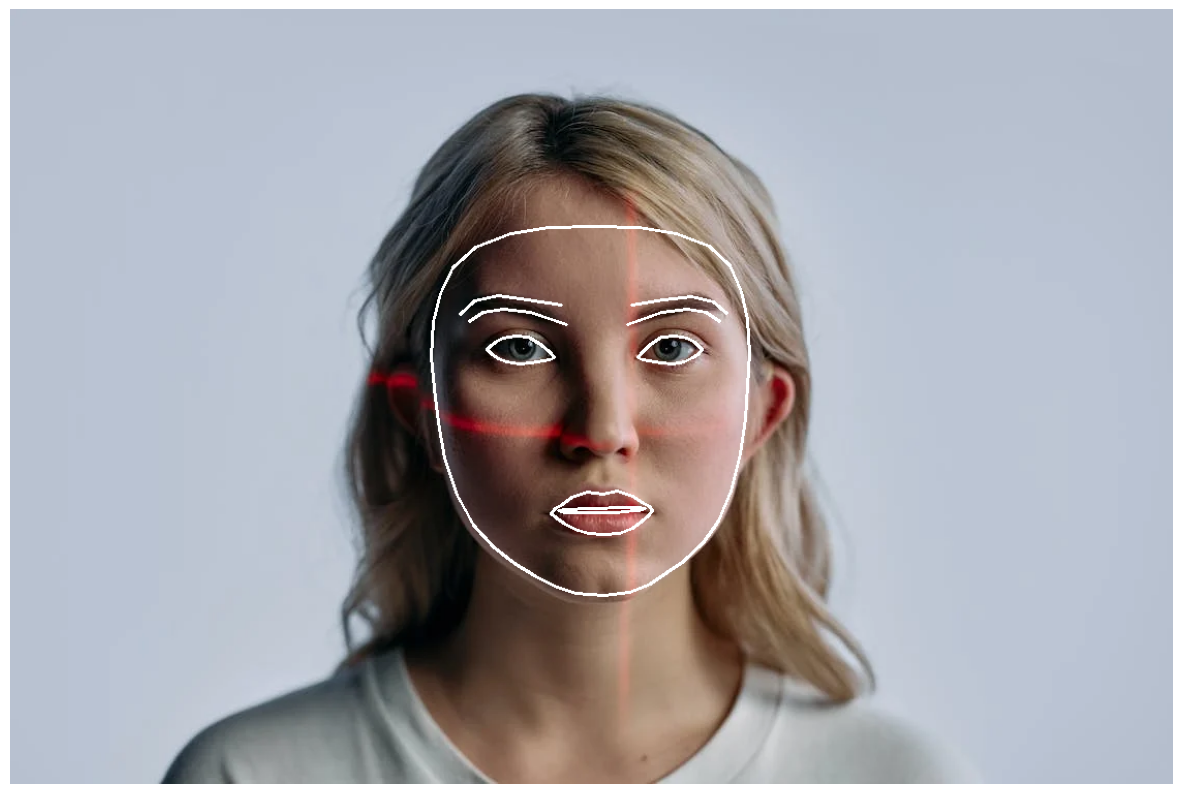

Lips :


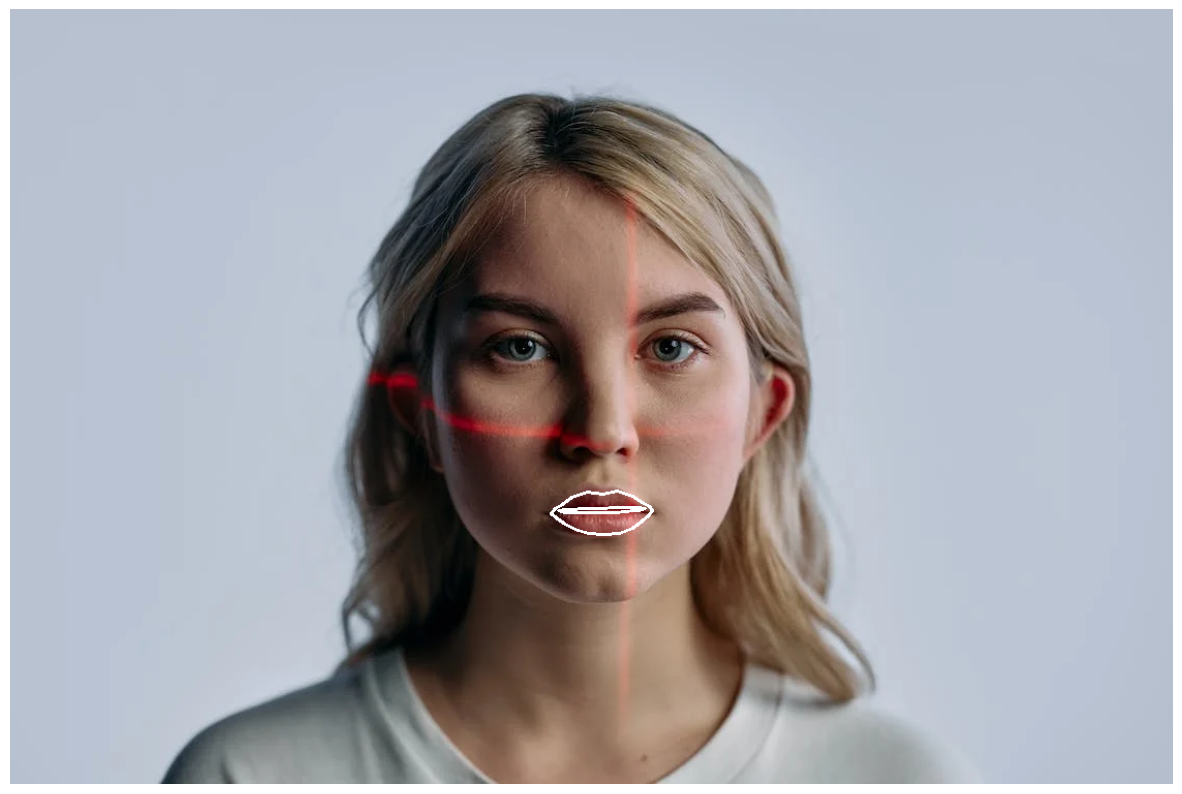

Face_oval :


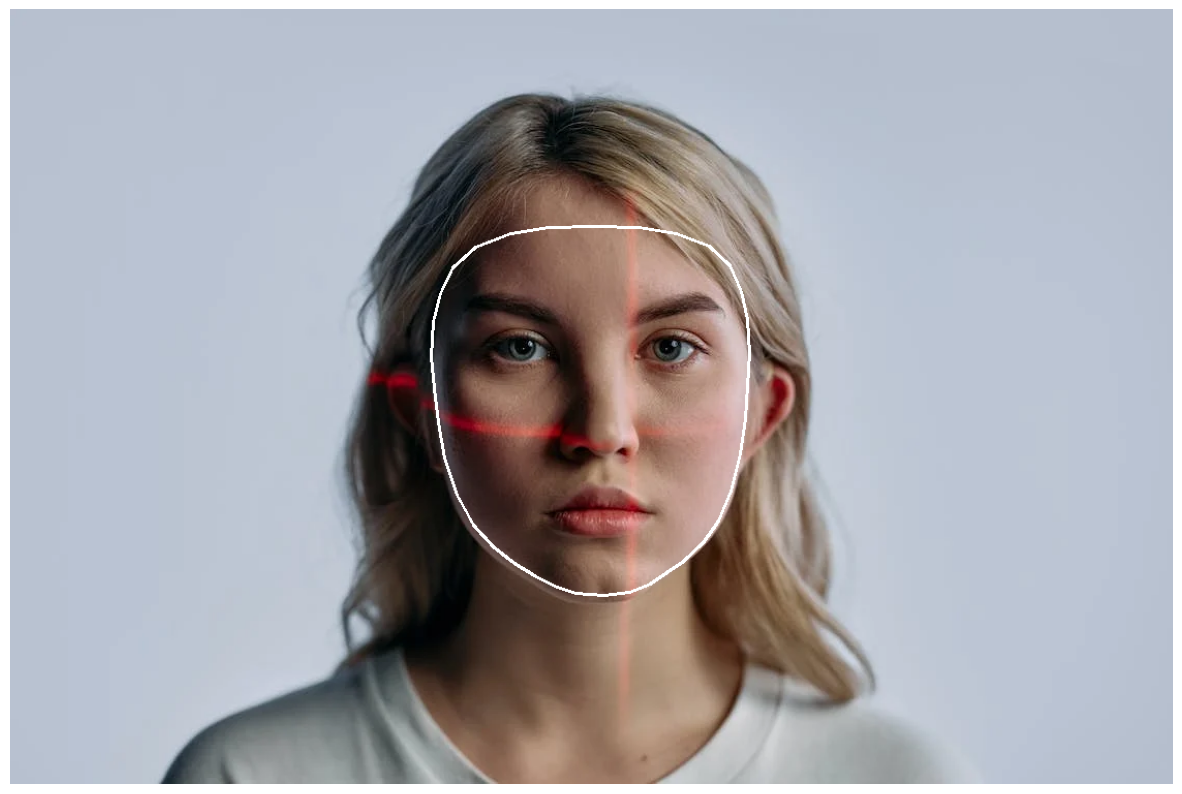

Left_eye :


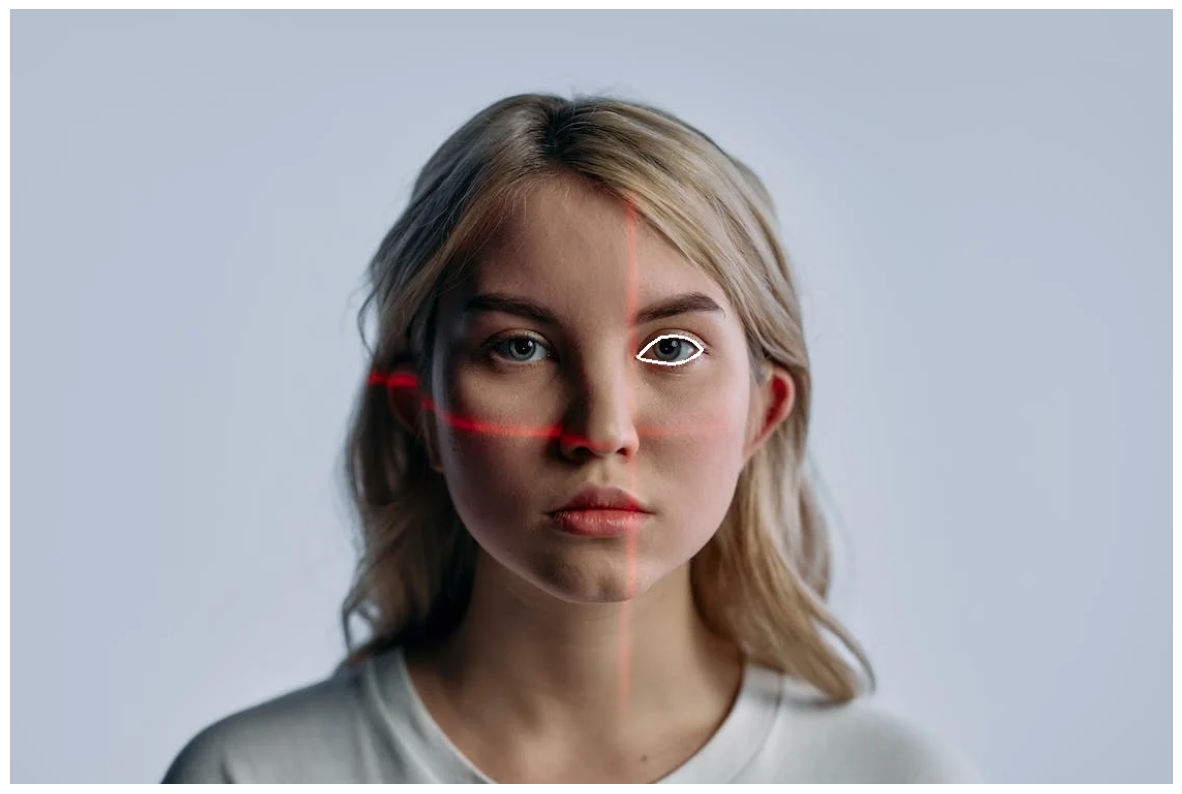

Left_eye_brow :


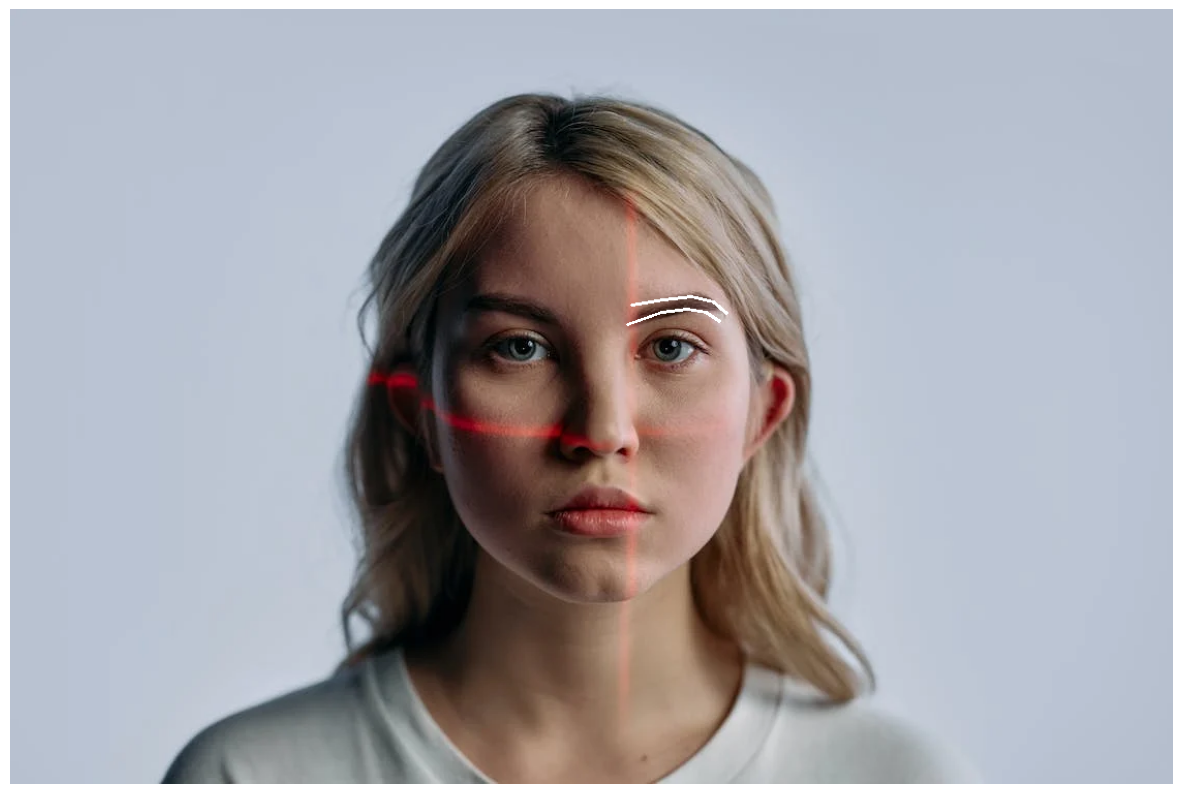

Right_eye :


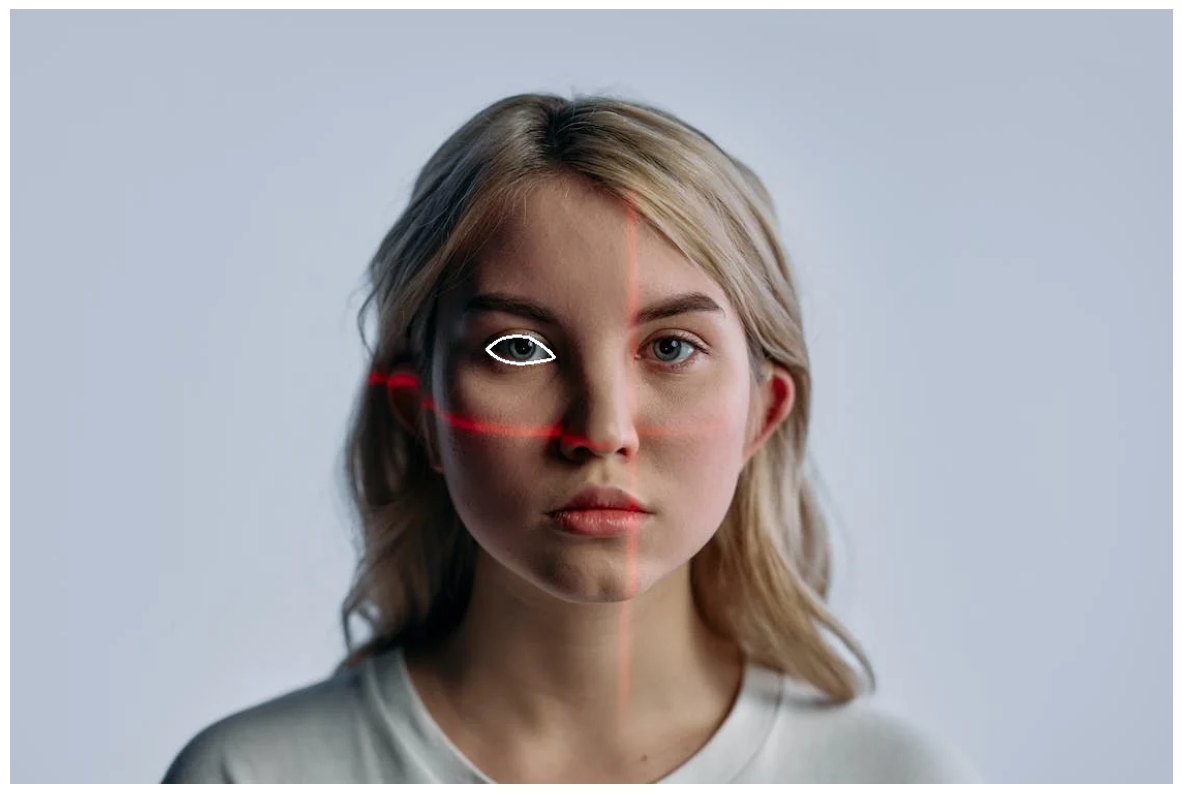

Right_eye_brow :


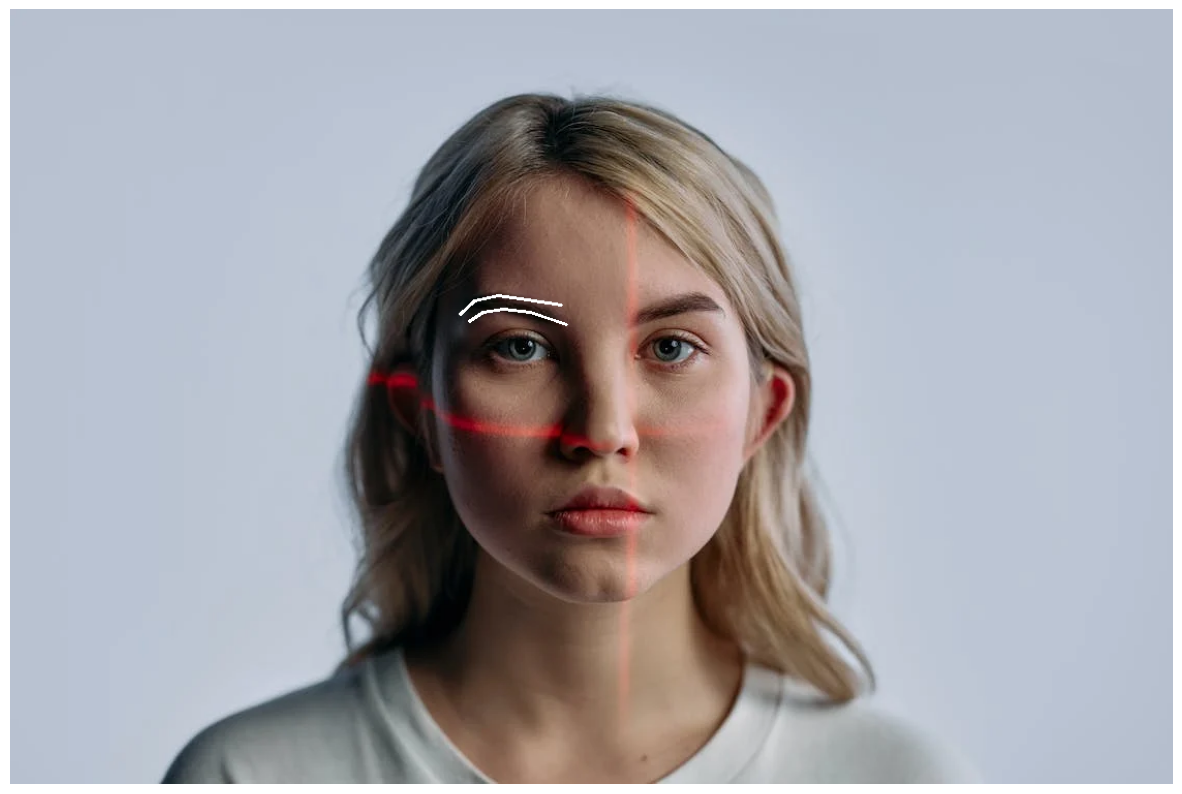

Tesselation :


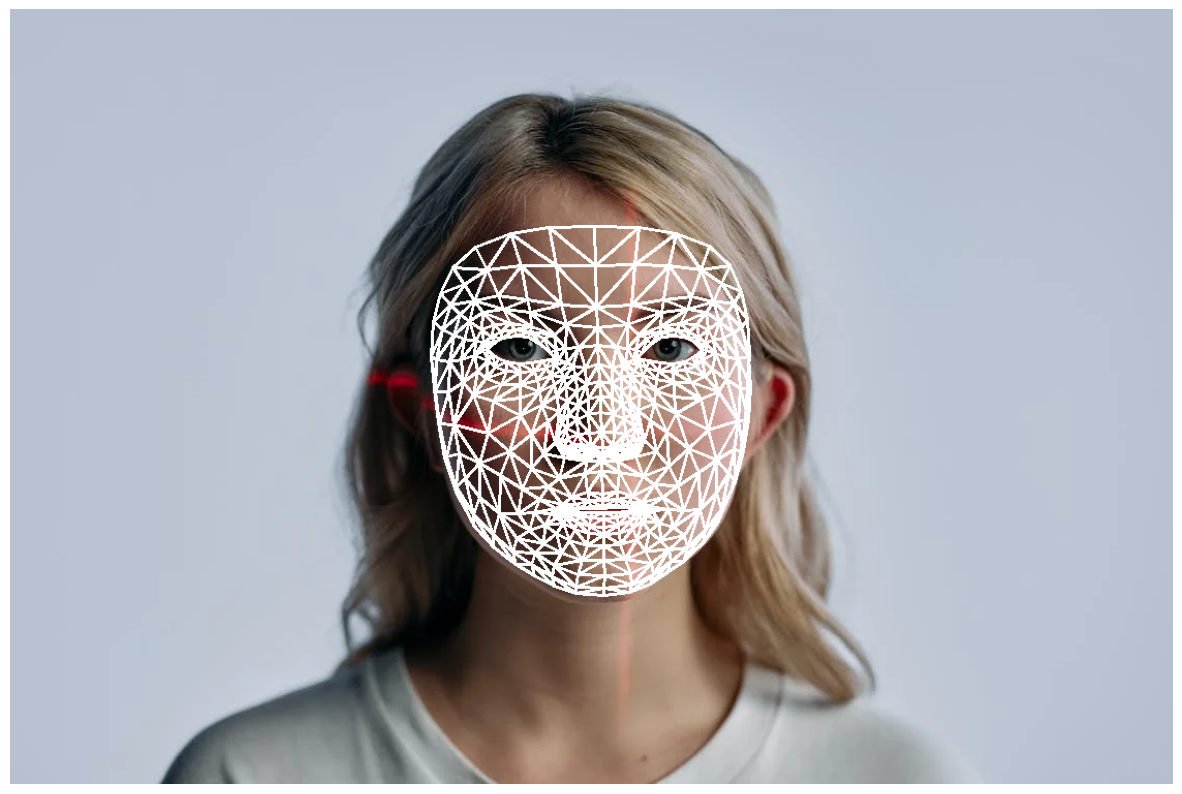

In [12]:
for facial_area in facial_areas.keys():
    facial_area_obj = facial_areas[facial_area]
    plot_landmark(img_base, facial_area, facial_area_obj)

# Landmarks with pixel by pixel

In [13]:
#for landmark in landmarks.landmark:
for idx, landmark in enumerate(landmarks.landmark):
    x = landmark.x
    y = landmark.y
    
    relative_x = int(img.shape[1] * x)
    relative_y = int(img.shape[0] * y)
    
    #print(relative_x, relative_y)
    cv2.circle(img, (relative_x, relative_y), 5, (0, 0, 255), -1)

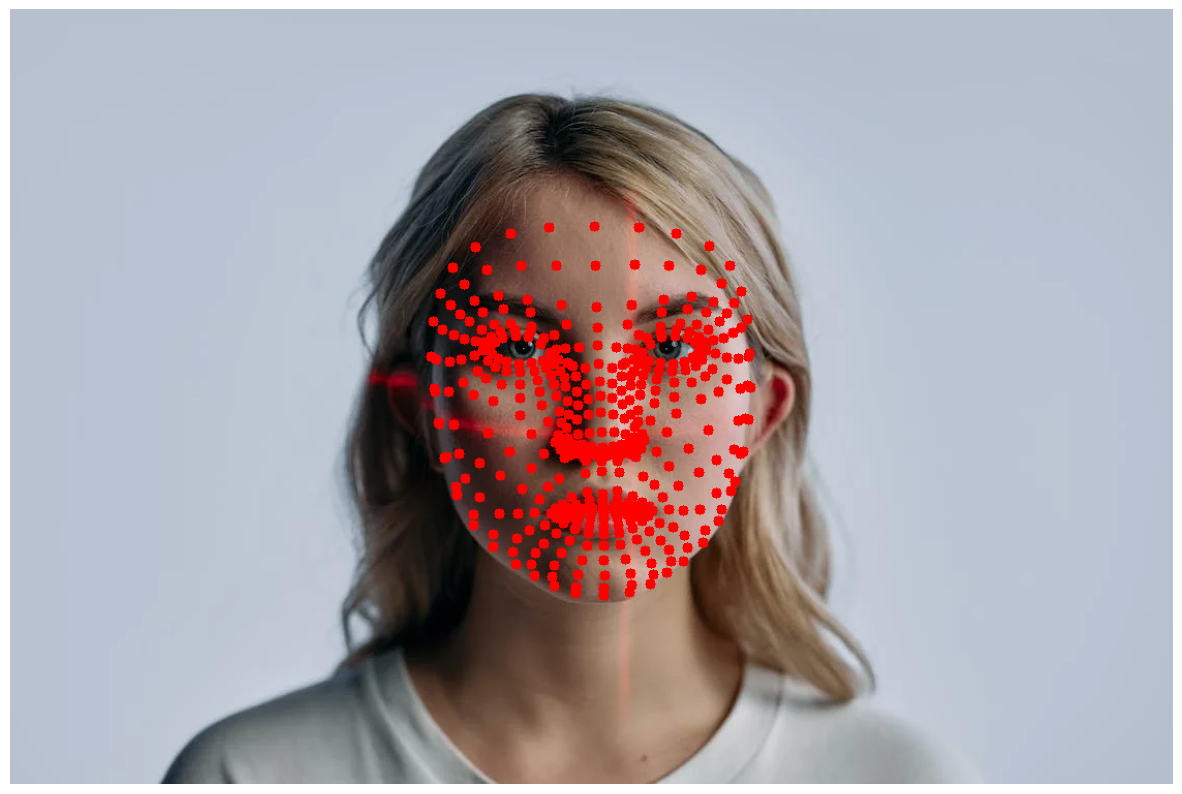

In [14]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(img[:, :, ::-1])

# Face detection

In [15]:
img = img_base.copy()

In [16]:
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection( min_detection_confidence=0.6)

In [17]:
results = face_detector.process(img)

In [18]:
if results.detections:
    for face in results.detections:
        confidence = face.score
        bounding_box = face.location_data.relative_bounding_box
        
        x = int(bounding_box.xmin * img.shape[1])
        w = int(bounding_box.width * img.shape[1])
        y = int(bounding_box.ymin * img.shape[0])
        h = int(bounding_box.height * img.shape[0])
        
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), thickness = 2)
        
        #------------------------------
        
        landmarks = face.location_data.relative_keypoints
        
        right_eye = (int(landmarks[0].x * img.shape[1]), int(landmarks[0].y * img.shape[0]))
        left_eye = (int(landmarks[1].x * img.shape[1]), int(landmarks[1].y * img.shape[0]))
        nose = (int(landmarks[2].x * img.shape[1]), int(landmarks[2].y * img.shape[0]))
        mouth = (int(landmarks[3].x * img.shape[1]), int(landmarks[3].y * img.shape[0]))
        right_ear = (int(landmarks[4].x * img.shape[1]), int(landmarks[4].y * img.shape[0]))
        left_ear = (int(landmarks[5].x * img.shape[1]), int(landmarks[5].y * img.shape[0]))
        
        
        
        cv2.circle(img, right_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, left_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, nose, 15, (0, 0, 255), -1)
        cv2.circle(img, mouth, 15, (0, 0, 255), -1)
        cv2.circle(img, right_ear, 15, (0, 0, 255), -1)
        cv2.circle(img, left_ear, 15, (0, 0, 255), -1)
        
        

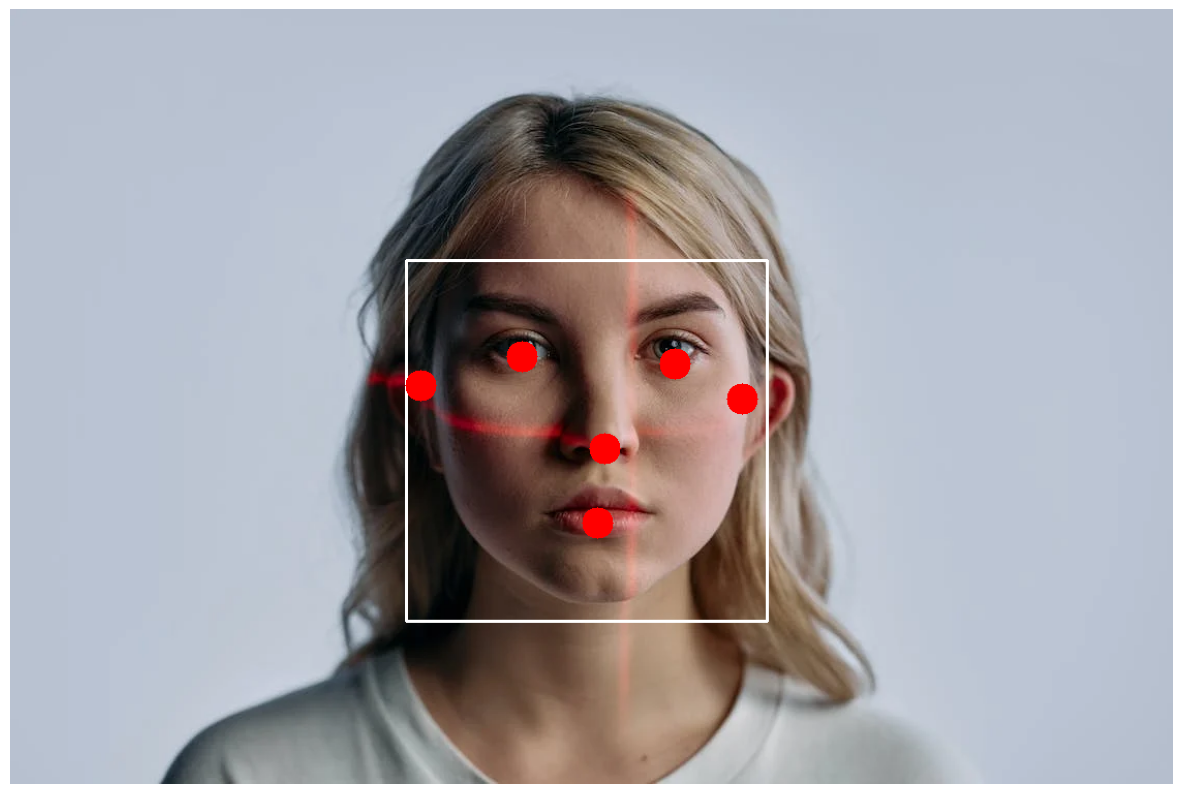

In [19]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(img[:, :, ::-1])